In [1]:
import os 
from tensorflow.keras.models import load_model
from tensorflow_addons.layers import GroupNormalization

os.environ["CUDA_VISIBLE_DEVICES"] = "7"

In [2]:
model_path = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet_training/hybrid_model_map_target/outputdata/no_augmentation_dropout_bs_2_hybrid_modelmap_lr0001_60k/saved_models/hybrid_model_map_target_final_epoch_15.hdf5"

In [3]:
def get_a_random_cube(verbose=True, choose_emdb_id=None, choose_cube_id=None):
    import os
    import random
    import numpy as np
    import tensorflow as tf
    
    all_emdb_folder = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet_training/hybrid_model_map_target/cubedata_directory/cubedata_validation/"
    random_emdb_id = random.choice([x for x in os.listdir(all_emdb_folder) if os.path.isdir(os.path.join(all_emdb_folder, x))]) if choose_emdb_id is None else choose_emdb_id
    emdb_folder = os.path.join(all_emdb_folder, random_emdb_id)
    emdb_folder_X = [os.path.join(emdb_folder, x,"cubes","original") for x in os.listdir(emdb_folder) if "X_emmap_cubes" in x][0]
    emdb_folder_Y = [os.path.join(emdb_folder, x,"cubes","original") for x in os.listdir(emdb_folder) if "Y_locscale_cubes" in x][0]
    
    if choose_cube_id is not None:
        cubeid_from_filename = lambda x: int(os.path.basename(x).split("_")[3])
        list_of_X_cubes = [os.path.join(emdb_folder_X, x) for x in os.listdir(emdb_folder_X) if "signal_cube_original" in x]
        list_of_Y_cubes = [os.path.join(emdb_folder_Y, x) for x in os.listdir(emdb_folder_Y) if "signal_cube_original" in x]
        X_cubeid_to_filename_dict = {cubeid_from_filename(x):x for x in list_of_X_cubes}
        Y_cubeid_to_filename_dict = {cubeid_from_filename(x):x for x in list_of_Y_cubes}
        sample_X_cube_path = X_cubeid_to_filename_dict[choose_cube_id]
        sample_Y_cube_path = Y_cubeid_to_filename_dict[choose_cube_id]
    else:            
        sample_X_cube_path = random.choice([os.path.join(emdb_folder_X, x) for x in os.listdir(emdb_folder_X) if "signal_cube_original" in x]) 
        sample_Y_cube_path = os.path.join(emdb_folder_Y, os.path.basename(sample_X_cube_path))
    cube_X = np.load(sample_X_cube_path)
    cube_Y = np.load(sample_Y_cube_path)
    nx, ny, nz, _ = cube_X.shape
    X_cube_1 = np.empty((1, nx, ny, nz, 1))
    Y_cube_1 = np.empty((1, nx, ny, nz, 1))
    X_cube_1[0, :, :, :, :] = cube_X
    Y_cube_1[0, :, :, :, :] = cube_Y

    X_cube_1_tf = tf.convert_to_tensor(X_cube_1, dtype=tf.float32)
    Y_cube_1_tf = tf.convert_to_tensor(Y_cube_1, dtype=tf.float32)
    if verbose:    
        print("EMDB ID: {}".format(random_emdb_id))
        print("Filename: {}".format(os.path.basename(sample_X_cube_path)))

    return X_cube_1_tf, Y_cube_1_tf

In [4]:
import numpy as np 
import random 
# load cubes
all_emdb_folder = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet_training/hybrid_model_map_target/cubedata_directory/cubedata_training/"
random_emdb_id = random.choice([x for x in os.listdir(all_emdb_folder) if os.path.isdir(os.path.join(all_emdb_folder, x))])
emdb_folder = os.path.join(all_emdb_folder, random_emdb_id)
emdb_folder_X = [os.path.join(emdb_folder, x,"cubes","original") for x in os.listdir(emdb_folder) if "X_emmap_cubes" in x][0]
emdb_folder_Y = [os.path.join(emdb_folder, x,"cubes","original") for x in os.listdir(emdb_folder) if "Y_locscale_cubes" in x][0]
sample_X_cube_path = random.choice([os.path.join(emdb_folder_X, x) for x in os.listdir(emdb_folder_X) if "signal_cube_original" in x])
sample_Y_cube_path = os.path.join(emdb_folder_Y, os.path.basename(sample_X_cube_path))

sample_cube_path_1 = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet_training/hybrid_model_map_target/cubedata_directory/cubedata_training/0038/X_emmap_cubes_0038_6gml/cubes/original/signal_cube_original_0_map_40_160_184.npy"
sample_cube_Y_path_1 = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet_training/hybrid_model_map_target/cubedata_directory/cubedata_training/0038/Y_locscale_cubes_0038_6gml/cubes/original/signal_cube_original_0_map_40_160_184.npy"
sample_cube_path_2 = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet_training/hybrid_model_map_target/cubedata_directory/cubedata_training/0038/X_emmap_cubes_0038_6gml/cubes/original/signal_cube_original_1_map_40_160_208.npy"
sample_cube_Y_path_2 = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet_training/hybrid_model_map_target/cubedata_directory/cubedata_training/0038/Y_locscale_cubes_0038_6gml/cubes/original/signal_cube_original_1_map_40_160_208.npy"
sample_cube_path_3 = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet_training/hybrid_model_map_target/cubedata_directory/cubedata_training/0038/X_emmap_cubes_0038_6gml/cubes/original/signal_cube_original_2_map_40_184_208.npy"
sample_cube_Y_path_3 = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet_training/hybrid_model_map_target/cubedata_directory/cubedata_training/0038/Y_locscale_cubes_0038_6gml/cubes/original/signal_cube_original_2_map_40_184_208.npy"

cube_1 = np.load(sample_cube_path_1)
cube_2 = np.load(sample_cube_path_2)
cube_3 = np.load(sample_cube_path_3)
cube_1_Y = np.load(sample_cube_Y_path_1)
cube_2_Y = np.load(sample_cube_Y_path_2)
cube_3_Y = np.load(sample_cube_Y_path_3)



In [5]:
nx, ny, nz,_ = cube_1.shape

X_cube_1 = np.empty((1, nx, ny, nz, 1))
X_cube_2 = np.empty((1, nx, ny, nz, 1))
X_cube_3 = np.empty((1, nx, ny, nz, 1))
Y_cube_1 = np.empty((1, nx, ny, nz, 3))
Y_cube_2 = np.empty((1, nx, ny, nz, 3))
Y_cube_3 = np.empty((1, nx, ny, nz, 3))

X_cube_1[0, :, :, :, :] = cube_1
X_cube_2[0, :, :, :, :] = cube_2
X_cube_3[0, :, :, :, :] = cube_3
Y_cube_1[0, :, :, :, :] = cube_1_Y
Y_cube_2[0, :, :, :, :] = cube_2_Y
Y_cube_3[0, :, :, :, :] = cube_3_Y

In [6]:
import tensorflow as tf
from scipy.stats import normaltest, shapiro

model = load_model(model_path, custom_objects={'GroupNormalization': GroupNormalization})

# convert X_cube_1, X_cube_2, X_cube_3 to tf tensors

X_cube_1_tf = tf.convert_to_tensor(X_cube_1, dtype=tf.float32)
X_cube_2_tf = tf.convert_to_tensor(X_cube_2, dtype=tf.float32)
X_cube_3_tf = tf.convert_to_tensor(X_cube_3, dtype=tf.float32)


In [7]:
import random
def get_list_of_values_at_a_random_location(list_of_cubes):
    cube1 = list_of_cubes[0]
    nx, ny, nz = cube1.shape
    index_x = np.random.randint(0, nx)
    index_y = np.random.randint(0, ny)
    index_z = np.random.randint(0, nz)

    list_of_values_1 = []
    for cube in list_of_cubes:
        list_of_values_1.append(cube[index_x, index_y, index_z])
    return list_of_values_1

In [8]:
def monte_carlo_cubes_analysis(X, iterations, cx=16, cy=16, cz=16): 
    import warnings
    warnings.filterwarnings("ignore")
    monte_carlo_cubes =  [model(X, training=True) for i in range(iterations)]
    monte_carlo_cubes = np.array([cube.numpy().reshape(32,32,32) for cube in monte_carlo_cubes])
    intensity_value_at_center = [monte_carlo_cubes[i][cz,cy,cx] for i in range(iterations)]
    return intensity_value_at_center

In [9]:
def monte_carlo_runs(X, iterations): 
    import warnings
    warnings.filterwarnings("ignore")

    monte_carlo_cubes =  [model(X, training=True) for i in range(iterations)]
    monte_carlo_cubes = np.array([cube.numpy() for cube in monte_carlo_cubes])
    return monte_carlo_cubes

In [10]:
intensity_values_1 = monte_carlo_cubes_analysis(X_cube_1_tf, 15)
intensity_values_2 = monte_carlo_cubes_analysis(X_cube_2_tf, 15)
intensity_values_3 = monte_carlo_cubes_analysis(X_cube_3_tf, 15)

In [11]:
mc_cubes_1 = monte_carlo_runs(X_cube_1_tf, 15)
mc_cubes_2 = monte_carlo_runs(X_cube_2_tf, 15)
mc_cubes_3 = monte_carlo_runs(X_cube_3_tf, 15)

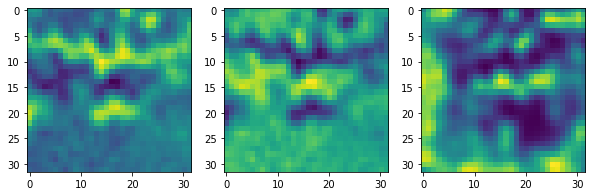

In [23]:
def invert_intensities(cube):
    maxval, minval = np.max(cube), np.min(cube)
    return maxval - cube + minval

cube_1_temp = get_a_random_cube(False)[0]
cube_1_temp_invert = invert_intensities(cube_1_temp)
cube_1_temp_invert_tf = tf.convert_to_tensor(cube_1_temp_invert, dtype=tf.float32)
intensity_values_1_invert = monte_carlo_cubes_analysis(cube_1_temp_invert_tf, 15)
mc_cubes_1_invert = monte_carlo_runs(cube_1_temp_invert_tf, 15)
mean_mc_cubes_1_invert = np.mean(mc_cubes_1_invert, axis=0)
var_mc_cubes_1_invert = np.var(mc_cubes_1_invert, axis=0)
# plot slices from cube_1_temp and cube_1_temp_invert
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize=(10,5))
slice_index = 16
ax[0].imshow(cube_1_temp[0,:,:,slice_index,0])
ax[1].imshow(cube_1_temp_invert[0,:,:,slice_index,0])
ax[2].imshow(mean_mc_cubes_1_invert[:,:,slice_index].squeeze())
plt.show()

# save as mrc files
output_folder_temp = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/invert_intensities"
from locscale.include.emmer.ndimage.map_utils import save_as_mrc
save_as_mrc(cube_1_temp_invert.numpy().squeeze(), os.path.join(output_folder_temp, "cube_1_temp_invert.mrc"), apix=1)
save_as_mrc(mean_mc_cubes_1_invert.squeeze(), os.path.join(output_folder_temp, "mean_mc_cubes_1_invert.mrc"), apix=1)
save_as_mrc(cube_1_temp.numpy().squeeze(), os.path.join(output_folder_temp, "cube_1_temp.mrc"), apix=1)



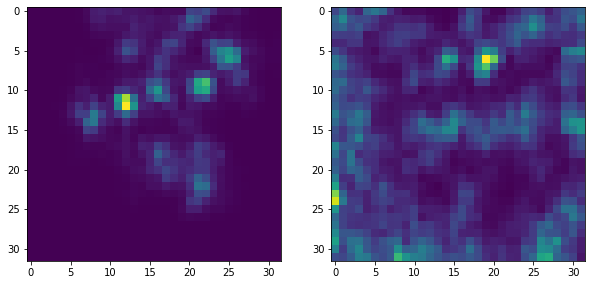

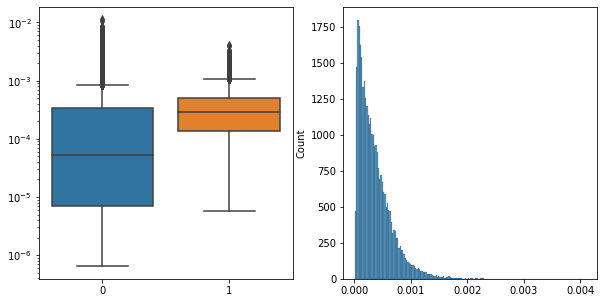

Median variance of inverted cube: 0.00028442105394788086
Median variance of non inverted cube: 5.285510269459337e-05
Mean variance of inverted cube: 0.0003607317921705544
Mean variance of non inverted cube: 0.00033452530624344945
Number of voxels where inverted cube has higher variance: 22426
Total voxels: 32768
Percentage of voxels where inverted cube has higher variance: 0.68438720703125


In [31]:
var_mc_cubes_1_invert = np.var(mc_cubes_1_invert, axis=0)
save_as_mrc(var_mc_cubes_1_invert.squeeze(), os.path.join(output_folder_temp, "var_mc_cubes_1_invert.mrc"), apix=1)

# predict using non inverted cube and find variance
cube_1_temp_tf = tf.convert_to_tensor(cube_1_temp, dtype=tf.float32)
mc_cubes_1_temp = monte_carlo_runs(cube_1_temp_tf, 15)
mean_mc_cubes_1_temp = np.mean(mc_cubes_1_temp, axis=0)
var_mc_cubes_1_temp = np.var(mc_cubes_1_temp, axis=0)
save_as_mrc(mean_mc_cubes_1_temp.squeeze(), os.path.join(output_folder_temp, "mean_mc_cubes_1_temp.mrc"), apix=1)
save_as_mrc(var_mc_cubes_1_temp.squeeze(), os.path.join(output_folder_temp, "var_mc_cubes_1_temp.mrc"), apix=1)

# show the variances of inverted and non inverted cubes
fig, ax = plt.subplots(1,2, figsize=(10,5))
slice_index = 16
ax[0].imshow(var_mc_cubes_1_temp[:,:,slice_index].squeeze())
ax[1].imshow(var_mc_cubes_1_invert[:,:,slice_index].squeeze())
plt.show()

# plot histograms of variance
fig, ax = plt.subplots(1,2, figsize=(10,5))
import seaborn as sns
sns.boxplot([var_mc_cubes_1_temp.squeeze().flatten(), var_mc_cubes_1_invert.squeeze().flatten()], ax=ax[0])
ax[0].set_yscale("log")
sns.histplot(var_mc_cubes_1_invert.squeeze().flatten(), ax=ax[1])
plt.show()

median_variance_invert = np.median(var_mc_cubes_1_invert)
median_variance_noninvert = np.median(var_mc_cubes_1_temp)
print("Median variance of inverted cube: {}".format(median_variance_invert))
print("Median variance of non inverted cube: {}".format(median_variance_noninvert))

mean_variance_invert = np.mean(var_mc_cubes_1_invert)
mean_variance_noninvert = np.mean(var_mc_cubes_1_temp)
print("Mean variance of inverted cube: {}".format(mean_variance_invert))
print("Mean variance of non inverted cube: {}".format(mean_variance_noninvert))

# find number of voxels where variance for inverted cube is greater than non inverted cube as a percentage of total voxels
variance_diff = var_mc_cubes_1_invert - var_mc_cubes_1_temp
num_voxels_where_invert_has_higher_variance = np.sum(variance_diff > 0)
total_voxels = np.prod(variance_diff.shape)
print("Number of voxels where inverted cube has higher variance: {}".format(num_voxels_where_invert_has_higher_variance))
print("Total voxels: {}".format(total_voxels))
print("Percentage of voxels where inverted cube has higher variance: {}".format(num_voxels_where_invert_has_higher_variance/total_voxels))



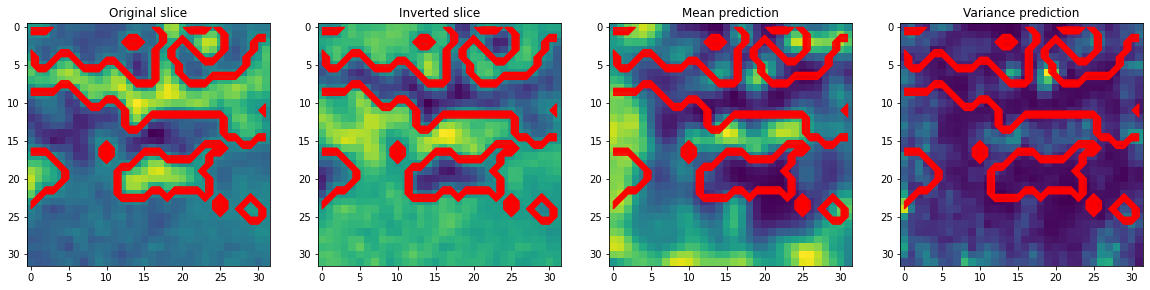

In [37]:
# Plot the original slice, inverted slice, mean prediction, and variance of the inverted slice
mask_threshold = 0.5 
# mask the original cube using hte mask_threshold
mask = cube_1_temp[0,:,:,:,0].numpy() > mask_threshold
mask = mask.squeeze()
original_slice = cube_1_temp[0,:,:,slice_index,0].numpy().squeeze()
inverted_slice = cube_1_temp_invert[0,:,:,slice_index,0].numpy().squeeze()
mean_prediction = mean_mc_cubes_1_invert[:,:,slice_index].squeeze()
variance_prediction = var_mc_cubes_1_invert[:,:,slice_index].squeeze()
mask_slice = mask[:,:,slice_index].squeeze()
fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].imshow(original_slice)
ax[0].set_title("Original slice")
# draw the mask as a contour
ax[0].contour(mask_slice, colors="red")
ax[1].imshow(inverted_slice)
ax[1].set_title("Inverted slice")
ax[1].contour(mask_slice, colors="red")
ax[2].imshow(mean_prediction)
ax[2].set_title("Mean prediction")
ax[2].contour(mask_slice, colors="red")
ax[3].imshow(variance_prediction)
ax[3].set_title("Variance prediction")
ax[3].contour(mask_slice, colors="red")
plt.show()


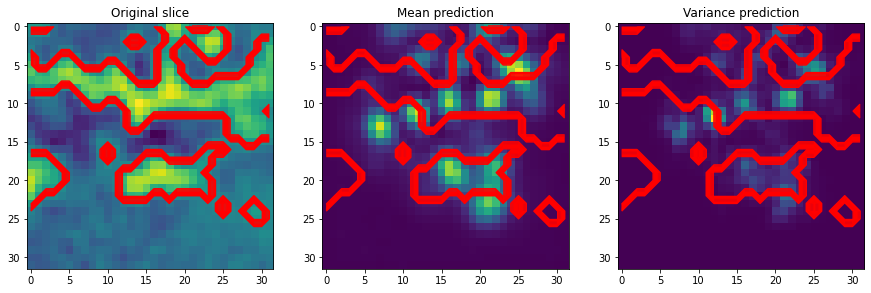

In [38]:
# plot the original slice, mean of prediction from original slice, and variance of prediction from original slice
mean_prediction_orig = np.mean(mc_cubes_1_temp, axis=0)
variance_prediction_orig = np.var(mc_cubes_1_temp, axis=0)
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(original_slice)
ax[0].set_title("Original slice")
ax[0].contour(mask_slice, colors="red")
ax[1].imshow(mean_prediction_orig[:,:,slice_index].squeeze())
ax[1].set_title("Mean prediction")
ax[1].contour(mask_slice, colors="red")
ax[2].imshow(variance_prediction_orig[:,:,slice_index].squeeze())
ax[2].set_title("Variance prediction")
ax[2].contour(mask_slice, colors="red")
plt.show()


In [13]:
def get_variance_evolution_of_random_cube():
    X, Y = get_a_random_cube(False)
    M = monte_carlo_runs(X, 50)
    # for a random voxel, find out how the variance changes with the number of samples 
    monte_carlo_total_runs = M.squeeze()
    random_x = np.random.randint(0, monte_carlo_total_runs.shape[-1])
    random_y = np.random.randint(0, monte_carlo_total_runs.shape[-2])
    random_z = np.random.randint(0, monte_carlo_total_runs.shape[-3])
    variances = []
    means = [] 
    for i in range(1, monte_carlo_total_runs.shape[0]):
        list_of_intensities = monte_carlo_total_runs[0:i, random_z, random_y, random_x]
        variance_of_list = np.var(list_of_intensities)
        mean_of_list = np.mean(list_of_intensities)
        variances.append(variance_of_list)
        means.append(mean_of_list)
    if len(variances) == 0:
        return None
    else:
        return variances, means

    

In [14]:
from tqdm import tqdm
list_of_variances = []
list_of_means = []
for _ in tqdm(range(50)):
    variances, means = get_variance_evolution_of_random_cube()
    list_of_variances.append(variances)
    list_of_means.append(means)
    

  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:06<05:31,  6.76s/it]


KeyboardInterrupt: 

In [ ]:
# dump list_of_variances to a json file 
import json 
# convert each element of list_of_variances to a string
new_list_of_variances = []
for variance in list_of_variances:
    new_list_of_variances.append([str(x) for x in variance])
new_list_of_means = []
for mean in list_of_means:
    new_list_of_means.append([str(x) for x in mean])
# dump to json file
# with open('list_of_means500.json', 'w') as f:
#     json.dump(new_list_of_means, f)
# with open('list_of_variances500.json', 'w') as f:
#     json.dump(new_list_of_variances, f)
    

Text(0, 0.5, 'Variance')

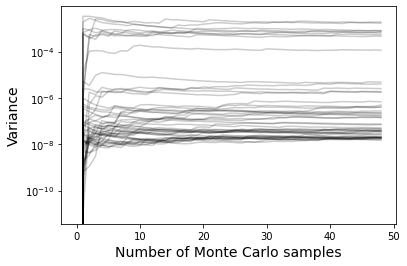

In [ ]:
import matplotlib.pyplot as plt
minmax_norm = lambda x: (x - x.min()) / (x.max() - x.min())
for variance in list_of_variances:
    plt.plot((np.array(variance[:])), "k", alpha=0.2)
    plt.yscale("log")

plt.xlabel("Number of Monte Carlo samples", fontsize=14)
plt.ylabel("Variance", fontsize=14)
#plt.savefig("monte_carlo_samples_and_variance500.png", dpi=300, bbox_inches="tight")



Text(0, 0.5, 'Means')

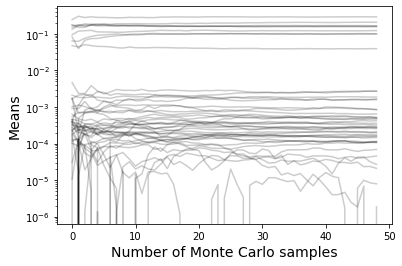

In [ ]:
import matplotlib.pyplot as plt
minmax_norm = lambda x: (x - x.min()) / (x.max() - x.min())
for means in list_of_means:
    plt.plot((np.array(means)), "k", alpha=0.2)
    plt.yscale("log")

plt.xlabel("Number of Monte Carlo samples", fontsize=14)
plt.ylabel("Means", fontsize=14)
#plt.savefig("monte_carlo_samples_and_means500.png", dpi=300, bbox_inches="tight")



Text(0.8, 0.8, 'N: 50')

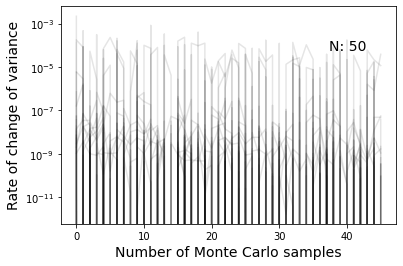

In [ ]:
# plot rate of changes 
smoothen = lambda x: np.convolve(x, np.ones((5,))/5, mode='valid')
list_of_rate_of_changes = []
for variance in list_of_variances:
    rate_of_change = np.diff(variance)
    list_of_rate_of_changes.append(rate_of_change)

# plot rate of changes
for rate_of_change in list_of_rate_of_changes:
    plt.plot(rate_of_change[2:], "k", alpha=0.1)
    plt.yscale("log")

plt.xlabel("Number of Monte Carlo samples", fontsize=14)
plt.ylabel("Rate of change of variance", fontsize=14)
# add a text showing the number of curves
plt.text(0.8, 0.8, "N: {}".format(len(list_of_rate_of_changes)), transform=plt.gca().transAxes, fontsize=14)
#plt.savefig("rate_of_change_of_variance500.png", dpi=300)


Text(0.8, 0.8, 'N: 50')

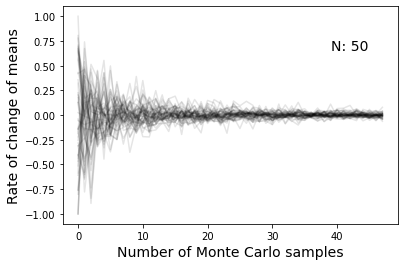

In [ ]:
list_of_rate_of_changes_of_means = []
for means in list_of_means:
    rate_of_change = np.diff(minmax_norm(np.array(means)))
    list_of_rate_of_changes_of_means.append(rate_of_change)

# plot rate of changes
for rate_of_change in list_of_rate_of_changes_of_means:
    plt.plot(rate_of_change, "k", alpha=0.1)

plt.xlabel("Number of Monte Carlo samples", fontsize=14)
plt.ylabel("Rate of change of means", fontsize=14)
# add a text showing the number of curves
plt.text(0.8, 0.8, "N: {}".format(len(list_of_rate_of_changes)), transform=plt.gca().transAxes, fontsize=14)
#plt.savefig("rate_of_change_of_means500.png", dpi=300)

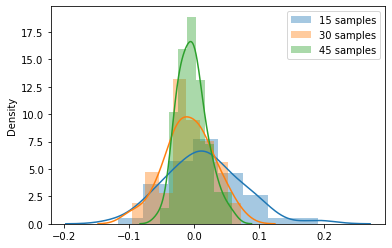

In [ ]:
import seaborn as sns 
list_of_rate_of_changes_of_means = np.array(list_of_rate_of_changes_of_means)

# plot the distribution of the rate of change of means at number of samples = 15 and 30
index_low = 15
index_high = 30
index_top = 45
distribution_low = list_of_rate_of_changes_of_means[:,index_low]
distribution_high = list_of_rate_of_changes_of_means[:,index_high]
distribution_top = list_of_rate_of_changes_of_means[:,index_top]
sns.distplot(distribution_low, label = f'{index_low} samples')
sns.distplot(distribution_high, label = f'{index_high} samples')
sns.distplot(distribution_top, label = f'{index_top} samples')
plt.legend()

EMDB ID: 8069
Filename: signal_cube_original_77_map_136_184_184.npy


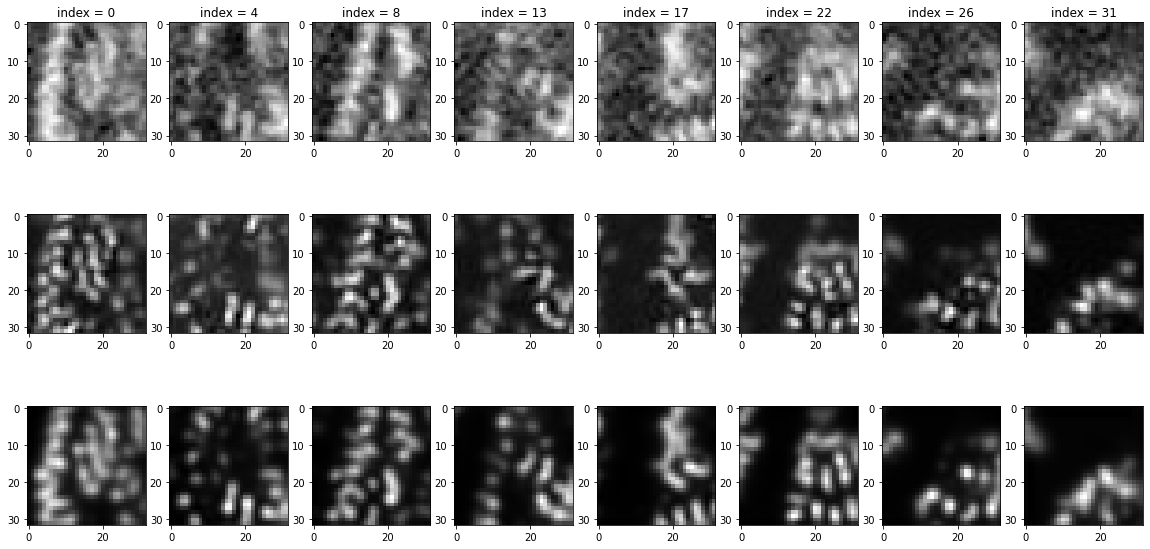

In [20]:
import matplotlib.pyplot as plt
X1, Y1 = get_a_random_cube(True, choose_emdb_id="8069", choose_cube_id=77)
prediction = model(X1)
num_subplots = 8
fig, ax = plt.subplots(3, num_subplots, figsize=(20, 10))
indices = np.linspace(0, 31, num_subplots, dtype=int)
for i, index in enumerate(indices):
    ax[0,i].imshow(X1.numpy().squeeze()[:, :, index], cmap='gray')
    ax[1,i].imshow(Y1.numpy().squeeze()[:, :, index], cmap='gray')
    ax[2,i].imshow(prediction.numpy().squeeze()[:, :, index], cmap='gray')
    ax[0,i].set_title(f'index = {index}')

prediction shape:  (1, 32, 32, 32, 1)
mean_MC_1 shape:  (1, 32, 32, 32, 1)


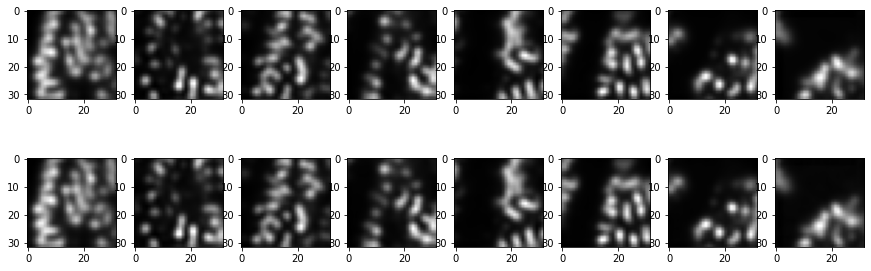

In [21]:
monte_carlo_samples_test = monte_carlo_runs(X1, 50)
mean_MC_1 = np.mean(monte_carlo_samples_test, axis=0)
fig, ax = plt.subplots(2, num_subplots, figsize=(15, 5))
print("prediction shape: ", prediction.shape)
print("mean_MC_1 shape: ", mean_MC_1.shape)
prediction_squeeze = prediction.numpy().squeeze()
mean_MC_1_squeeze = mean_MC_1.squeeze()

for i, index in enumerate(indices):
    ax[0,i].imshow(prediction_squeeze[:, :, index].squeeze(), cmap='gray')
    ax[1,i].imshow(mean_MC_1_squeeze[:, :, index].squeeze(), cmap='gray')

In [37]:
# save all the monte carlo samples 
from locscale.include.emmer.ndimage.map_utils import save_as_mrc
monte_carlo_samples_test_squeeze = np.squeeze(monte_carlo_samples_test)
output_folder = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet/scripts/misc/monte_carlo_samples_large/9112_cube_15/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
for i in range(50):
    sample = monte_carlo_samples_test_squeeze[i,:,:,:]
    filepath = os.path.join(output_folder, "monte_carlo_sample_{}.mrc".format(i))
    #save_as_mrc(sample, filepath, apix=1.0)
# save the mean and std
mean_map_MC = np.mean(monte_carlo_samples_test_squeeze, axis=0)
var_map_MC = np.var(monte_carlo_samples_test_squeeze, axis=0)

mean_map_path = os.path.join(output_folder, "mean_map.mrc")
var_map_path = os.path.join(output_folder, "var_map.mrc")

# save_as_mrc(mean_map_MC, mean_map_path, apix=1.0)
# save_as_mrc(var_map_MC, var_map_path, apix=1.0)

# save the input map, output map and the sharpened map
input_map = X1.numpy().squeeze()
output_map = Y1.numpy().squeeze()

diffmap = output_map - mean_map_MC

# save_as_mrc(input_map, os.path.join(output_folder, "input_map.mrc"), apix=1.0)
# save_as_mrc(output_map, os.path.join(output_folder, "output_map.mrc"), apix=1.0)

# save_as_mrc(diffmap, os.path.join(output_folder, "diff_map.mrc"), apix=1.0)




In [23]:
from tqdm import tqdm
from scipy.stats import norm 
from scipy.stats import shapiro
standardize = lambda x: (x - np.mean(x)) / np.std(x)
MC_1 = monte_carlo_runs(X1, 15)
print("MC_1 shape: ", MC_1.shape)
mean_map = np.mean(MC_1, axis=0)
print(mean_map.shape)
MC_1 = MC_1.squeeze()
print("MC_1 shape: ", MC_1.shape)
p_values_map = np.zeros((32,32,32))
significant_map = np.zeros((32,32,32))
max_likelihood_map = np.zeros((32,32,32))
intensity_values_dict = {}
for ii in range(32):
    for jj in range(32):
        for kk in range(32):
            intensity_values_list = MC_1[:,ii,jj,kk]
            intensity_values_dict[(ii,jj,kk)] = intensity_values_list
            p_value = shapiro(standardize(intensity_values_list)).pvalue
            p_values_map[ii,jj,kk] = p_value
            significant_map[ii,jj,kk] = p_value < 0.05
            mu_fit, sigma_fit = norm.fit(intensity_values_list)
            max_likelihood_map[ii,jj,kk] = mu_fit
            sigma = np.std(intensity_values_list)
            assert np.isclose(sigma, sigma_fit)



MC_1 shape:  (15, 1, 32, 32, 32, 1)
(1, 32, 32, 32, 1)
MC_1 shape:  (15, 32, 32, 32)


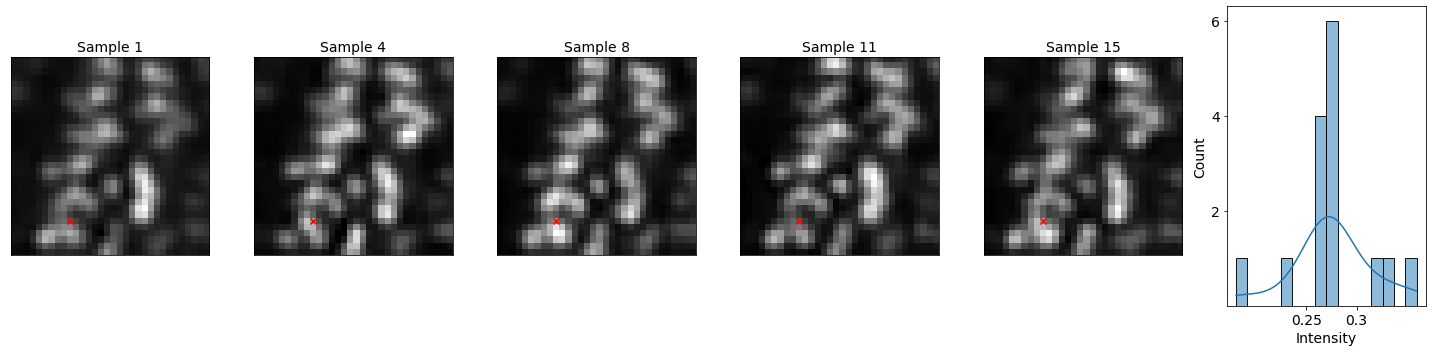

In [24]:
import seaborn as sns
mc_1_samples = MC_1.squeeze()
n_samples_plot = 5
fig, ax = plt.subplots(1, n_samples_plot+1, figsize=(20, 5))
index_top = 8
index_bottom = 22
intensities_top = []
intensities_bottom = []
voxel_top = (9, 26, index_top)
voxel_bottom = (18, 12, index_bottom)
for plot_index, i in enumerate(np.linspace(0, mc_1_samples.shape[0]-1, n_samples_plot, dtype=int)):
    ax[plot_index].imshow(mc_1_samples[i, :,:,index_top], cmap='gray')
    ax[plot_index].scatter(voxel_top[0], voxel_top[1], color='red', marker='x')
    # hide the axis labels
    ax[plot_index].set_xticks([])
    ax[plot_index].set_yticks([])
    
    #ax[1,plot_index].imshow(mc_1_samples[i, :,:,index_bottom], cmap='gray')
    #ax[1,plot_index].scatter(voxel_bottom[0], voxel_bottom[1], color='red', marker='x')
    ax[plot_index].set_title('Sample {}'.format(i+1), fontsize=14)
    
intensities_top = mc_1_samples[:, voxel_top[0], voxel_top[1], voxel_top[2]]
intensities_bottom = mc_1_samples[:, voxel_bottom[0], voxel_bottom[1], voxel_bottom[2]]

sns.histplot(intensities_top, ax=ax[plot_index+1], kde=True)


ax[plot_index+1].set_xlabel("Intensity", fontsize=14)
ax[plot_index+1].set_ylabel("Count", fontsize=14)
x_labels = [0.25, 0.3]
ax[plot_index+1].set_xticks(x_labels)
ax[plot_index+1].set_xticklabels(x_labels, fontsize=14)
y_labels = [2, 4, 6]
ax[plot_index+1].set_yticks(y_labels)
ax[plot_index+1].set_yticklabels(y_labels, fontsize=14)

#sns.histplot(intensities_bottom, ax=ax[1,plot_index+1], kde=True)

plt.tight_layout()
output_folder = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet/scripts/misc/monte_carlo_samples_large/8069_cube_77"
figsavepath = os.path.join(output_folder, 'monte_carlo_sampled_example_cube_77.eps')
#plt.savefig(figsavepath, dpi=600, bbox_inches='tight')
    

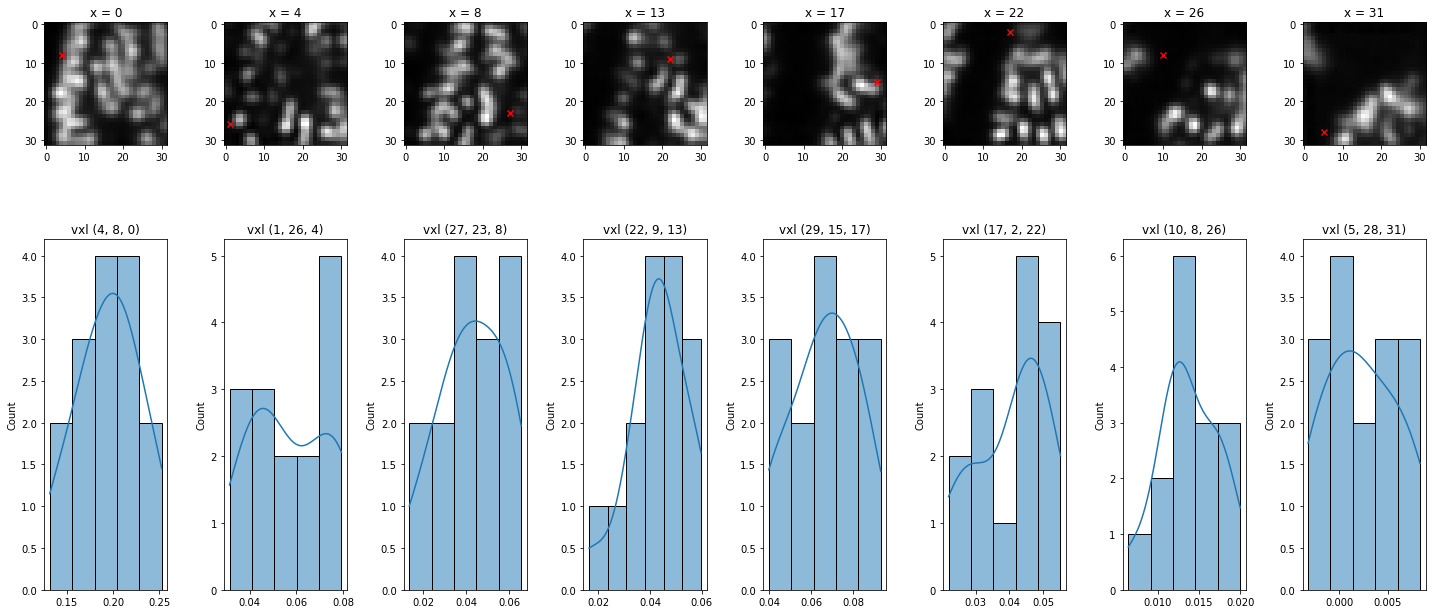

In [25]:
# plot the intensity distribution as a histogram for 8 random voxels 
import seaborn as sns
random_voxels_for_visualisation = random.sample(intensity_values_dict.keys(), 8)
random_intensity_values = [intensity_values_dict[voxel] for voxel in random_voxels_for_visualisation]

fig, axes = plt.subplots(2, num_subplots, figsize=(20, 10))
for i, index in enumerate(indices):
    axes[0,i].imshow(mean_map.squeeze()[:, :, index], cmap='gray')
    # mark the random voxels with a red cross
    # choose a random X, Y coordinate from the voxel
    random_z = np.random.randint(0, 31)
    random_y = np.random.randint(0, 31)
    random_x = index
    axes[0,i].scatter(random_z, random_y, marker='x', color='red')
    # mark the red cross with the voxel index in the plot
    #axes[0,i].text(random_voxels_for_visualisation[i][0], random_voxels_for_visualisation[i][1], str(random_voxels_for_visualisation[i]), color='red', bbox=dict(facecolor='white', alpha=0.5))
    voxel = (random_z, random_y, random_x)
    axes[0,i].set_title('x = {}'.format(index))
    sns.histplot(intensity_values_dict[voxel], ax=axes[1,i], kde=True)
    axes[1,i].set_title('vxl {}'.format(voxel))
plt.tight_layout()
#plt.savefig(os.path.join(output_folder, 'intensity_distribution.eps'), dpi=600)
plt.show()

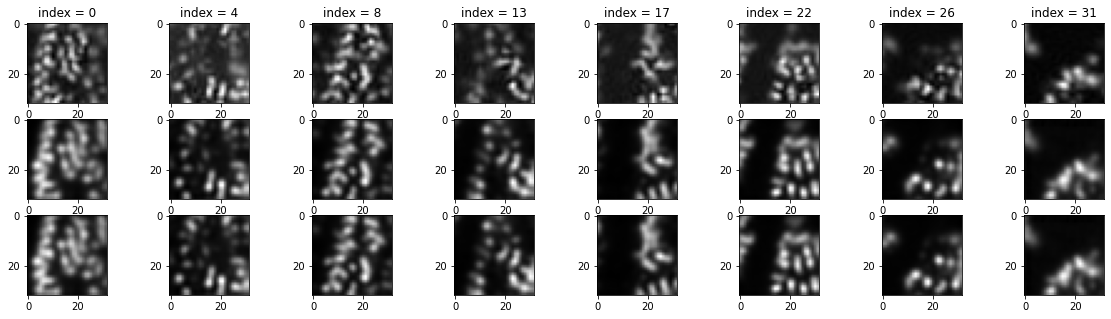

In [26]:

fig, axes = plt.subplots(3,num_subplots, figsize=(20,5))
for i, index in enumerate(indices):
    axes[0,i].imshow(Y1.numpy().squeeze()[:, :, index], cmap='gray')
    axes[0,i].set_title(f'index = {index}')
    axes[1,i].imshow(mean_map.squeeze()[:, :, index], cmap='gray')
    axes[2,i].imshow(max_likelihood_map[:, :, index], cmap='gray')

Number of significant voxels: 2006.0. Percentage of total voxels: 0.06121826171875


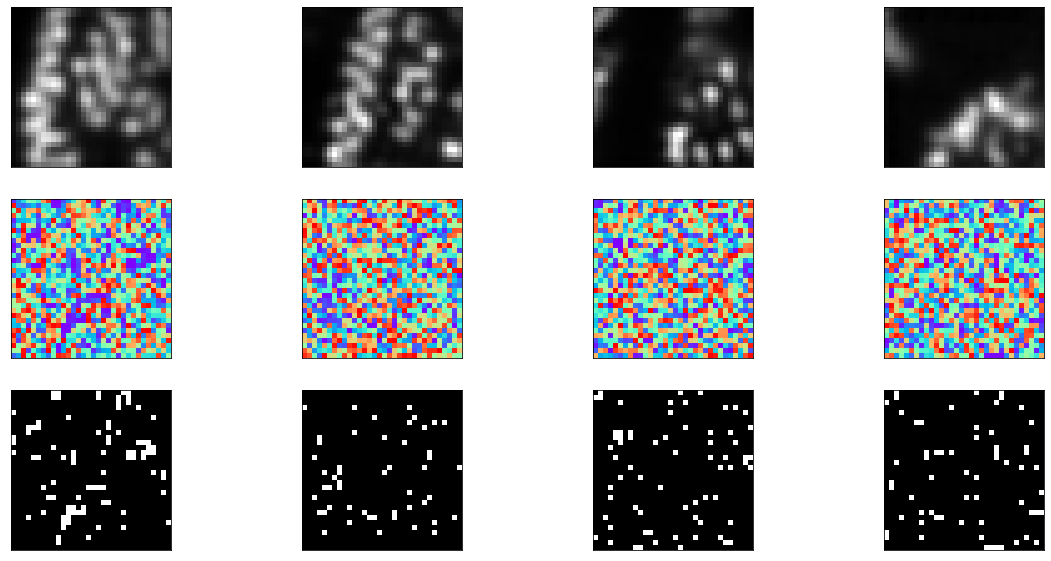

In [44]:
num_subplots_new = 4
indices = np.linspace(0, 31, num_subplots_new, dtype=int)
fig, ax = plt.subplots(3,num_subplots_new, figsize=(20,10))
# print number of significant voxels as a percentage of total voxels
print(f"Number of significant voxels: {np.sum(significant_map)}. Percentage of total voxels: {np.sum(significant_map)/np.prod(significant_map.shape)}")
for i, index in enumerate(indices):
    # plot the X cube slice in first two, p value in second and significance in third
    ax[0,i].imshow(mean_map.squeeze()[:,:, index], cmap='gray')
    # hide x and y tick
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    
    ax[1,i].imshow(p_values_map[:, :, index], cmap='rainbow')
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])

    
    ax[2,i].imshow(significant_map[:, :, index], cmap='gray')
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])

savepath = os.path.join(output_folder, 'mean_map_p_value_map_significant_map.eps')
plt.savefig(savepath, dpi=600, bbox_inches='tight')
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


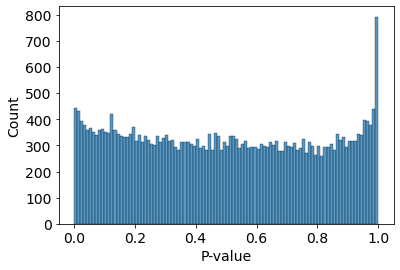

In [46]:
# draw a distribution of p-values
p_values_flat = p_values_map.flatten()
sns.histplot(p_values_flat, bins=100)
plt.xlabel("P-value", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(os.path.join(output_folder, 'p_value_distribution.eps'), dpi=600, bbox_inches='tight')
plt.show()


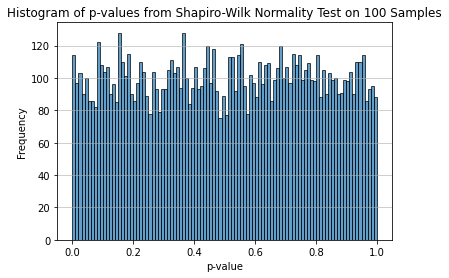

In [34]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Generate 100 samples of p-values from normality tests
p_values_test = [shapiro(np.random.normal(loc=0, scale=1, size=100)).pvalue for _ in range(10000)]

# Plot the distribution of p-values
plt.hist(p_values_test, bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values from Shapiro-Wilk Normality Test on 100 Samples')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
import seaborn as sns
sns.histplot([intensity_values_1, intensity_values_2, intensity_values_3], kde=True)

In [ ]:
from scipy.stats import probplot 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
probplot(intensity_values_1, plot=ax[0]);
probplot(intensity_values_2, plot=ax[1]);
probplot(intensity_values_3, plot=ax[2]);

In [ ]:
from tqdm import tqdm
p_value_distribution = {1: [], 2: [], 3: []}
intensity_distribution = {1: [], 2: [], 3: []}
variance_values_distribution = {1: [], 2: [], 3: []}
for monte_carlo_iteration in tqdm(range(1, 50)):
    intensity_1 = monte_carlo_cubes_analysis(X_cube_1_tf, monte_carlo_iteration)
    intensity_2 = monte_carlo_cubes_analysis(X_cube_2_tf, monte_carlo_iteration)
    intensity_3 = monte_carlo_cubes_analysis(X_cube_3_tf, monte_carlo_iteration)
    
    intensity_distribution[1].append(intensity_1)
    intensity_distribution[2].append(intensity_2)
    intensity_distribution[3].append(intensity_3)
    
    #p_value_distribution[1].append(shapiro(intensity_1)[1])
    #p_value_distribution[2].append(shapiro(intensity_2)[1])
    #p_value_distribution[3].append(shapiro(intensity_3)[1])
    
    variance_values_distribution[1].append(np.var(intensity_1))
    variance_values_distribution[2].append(np.var(intensity_2))
    variance_values_distribution[3].append(np.var(intensity_3))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, normaltest
fig, ax = plt.subplots(1,2, figsize=(12,4))
num_samples = 15
test_result = normaltest(intensity_distribution[1][num_samples])
print(f"p-value: {test_result.pvalue}")
probplot(intensity_distribution[1][num_samples], plot=ax[0])
sns.histplot(intensity_distribution[1][num_samples], ax=ax[1], kde=True)


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 6))
sns.violinplot([intensity for intensity in intensity_distribution[1]], ax=ax)
ax.set_title('Distribution of Intensity Values')
ax.set_xlabel('Number of Monte Carlo Samples')
ax.set_ylabel('Intensity Value')
# set x tick labels from 8 to 50 
ax.set_xticks(range(0,49));
ax.set_xticklabels(range(1, 50));

In [ ]:
len(monte_carlo_samples)

In [ ]:
# plot the variance as a function of the number of samples for the three cubes 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
monte_carlo_samples = np.arange(8, 50, 1)
variance_1 = variance_values_distribution[1]
variance_2 = variance_values_distribution[2]
variance_3 = variance_values_distribution[3]
ax.plot(monte_carlo_samples, variance_1, label='Cube 1')
ax.plot(monte_carlo_samples, variance_2, label='Cube 2')
ax.plot(monte_carlo_samples, variance_3, label='Cube 3')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# plot the percentage of samples with p values less than 0.05 as a function of the number of samples
significant = lambda x: np.sum(x < 0.05) / len(x)

percentage_significant = [significant(x) for x in p_value_distribution.values()]

plt.plot(p_value_distribution.keys(), percentage_significant)

In [ ]:
index_test = 49 
print(p_value_distribution[index_test])
print(significant(p_value_distribution[index_test]))


In [ ]:
from scipy.stats import shapiro
sns.histplot(intensity_distribution[index_test][49])
print(shapiro(intensity_distribution[index_test][49]))
print(len(intensity_distribution[index_test][49]))

In [ ]:
np.sum(p_value_distribution[index_test] < 0.05)